In [1]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./iris_csv.csv')

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

df = pd.read_csv('iris_csv.csv')

df['class'] = df['class'].map(d)

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


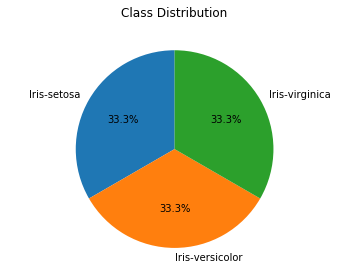

In [22]:
# Check  distribution of data
class_dist = df.groupby('class').size()
labels = 'Iris-setosa','Iris-versicolor', 'Iris-virginica'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [5]:
data = df.values[:, 0:4]
labels = df.values[:, 4]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Test accuracy: 97.37%


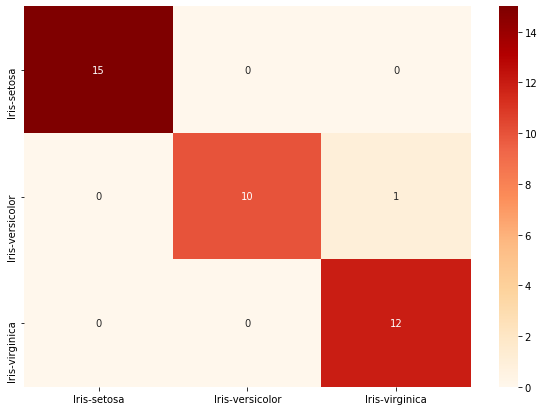

In [7]:
dtClf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=5)
y_pred = dtClf.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (dtClf.score(X_test, y_test)*100))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


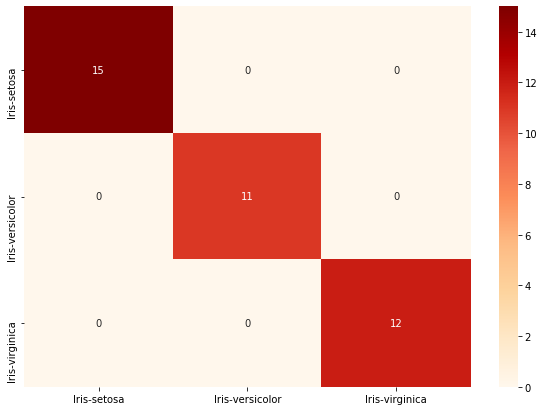

In [8]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (gnb.score(X_test, y_test)*100))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


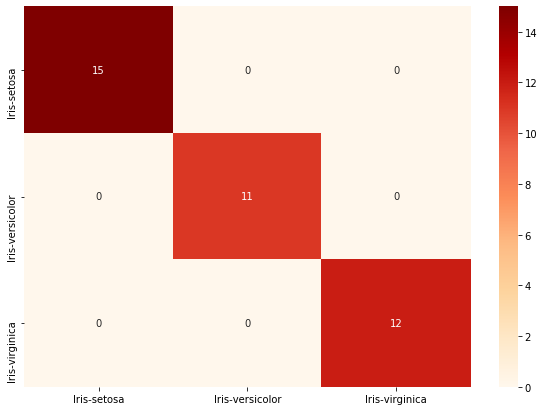

In [9]:
clfSVM = svm.SVC()
y_pred = clfSVM.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (clfSVM.score(X_test, y_test)*100))